In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("F:/n/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
mean_age = np.mean(df['Age'].dropna())

df['Age'] = df['Age'].fillna(mean_age)

In [6]:
# Extract the deck level from the Cabin column
df['Deck'] = df['Cabin'].str[:1].astype('category')

# Drop the Cabin column
df = df.drop('Cabin', axis=1)

In [7]:
# Calculate the mode embarked value
mode_embarked = df['Embarked'].mode()[0]

# Impute the missing embarked values with the mode
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [8]:
df=pd.concat([df.iloc[:,0:2],df.iloc[:,2:3],df.iloc[:,4:11]],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [9]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [10]:
df=pd.get_dummies(df,columns=['Pclass','Parch','Embarked'])
df

,PassengerId,Survived,Sex,Age,SibSp,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,male,22.000000,1,A/5 21171,7.2500,False,False,True,True,False,False,False,False,False,False,False,False,True
1,2,1,female,38.000000,1,PC 17599,71.2833,True,False,False,True,False,False,False,False,False,False,True,False,False
2,3,1,female,26.000000,0,STON/O2. 3101282,7.9250,False,False,True,True,False,False,False,False,False,False,False,False,True
3,4,1,female,35.000000,1,113803,53.1000,True,False,False,True,False,False,False,False,False,False,False,False,True
4,5,0,male,35.000000,0,373450,8.0500,False,False,True,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,male,27.000000,0,211536,13.0000,False,True,False,True,False,False,False,False,False,False,False,False,True
887,888,1,female,19.000000,0,112053,30.0000,True,False,False,True,False,False,False,False,False,False,False,False,True
888,889,0,female,29.699118,1,W./C. 6607,23.4500,False,False,True,False,False,True,False,False,False,False,False,False,True
889,890,1,male,26.000000,0,111369,30.0000,True,False,False,True,False,False,False,False,False,False,True,False,False


In [16]:
binary_cols = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

for col in binary_cols:
    df[col] = df[col].astype(int)

In [18]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == "male" else 0)

In [20]:
df

,PassengerId,Survived,Sex,Age,SibSp,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.000000,1,A/5 21171,7.2500,0,0,1,1,0,0,0,0,0,0,0,0,1
1,2,1,0,38.000000,1,PC 17599,71.2833,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,0,26.000000,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,1
3,4,1,0,35.000000,1,113803,53.1000,1,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,1,35.000000,0,373450,8.0500,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.000000,0,211536,13.0000,0,1,0,1,0,0,0,0,0,0,0,0,1
887,888,1,0,19.000000,0,112053,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,1
888,889,0,0,29.699118,1,W./C. 6607,23.4500,0,0,1,0,0,1,0,0,0,0,0,0,1
889,890,1,1,26.000000,0,111369,30.0000,1,0,0,1,0,0,0,0,0,0,1,0,0


In [22]:
x=pd.concat([df['PassengerId'],df.iloc[:,2:4],df.iloc[:,7:]],axis=1)
y=df.iloc[:,1]

In [24]:
x

,PassengerId,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,1,22.000000,0,0,1,1,0,0,0,0,0,0,0,0,1
1,2,0,38.000000,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,0,26.000000,0,0,1,1,0,0,0,0,0,0,0,0,1
3,4,0,35.000000,1,0,0,1,0,0,0,0,0,0,0,0,1
4,5,1,35.000000,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,27.000000,0,1,0,1,0,0,0,0,0,0,0,0,1
887,888,0,19.000000,1,0,0,1,0,0,0,0,0,0,0,0,1
888,889,0,29.699118,0,0,1,0,0,1,0,0,0,0,0,0,1
889,890,1,26.000000,1,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
classifier=LogisticRegression()
classifier.fit(x,y)

F:\chait\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred=classifier.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [32]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [34]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[471,  78],
       [102, 240]], dtype=int64)

In [36]:
classifier.predict_proba(x)[:,1] 

array([0.09251491, 0.91947059, 0.53817486, 0.88545628, 0.06317611,
       0.11995457, 0.24551569, 0.18787733, 0.41911115, 0.90550899,
       0.73813571, 0.78820699, 0.09818639, 0.02983954, 0.63115889,
       0.61528361, 0.28341991, 0.21623299, 0.49913976, 0.62809672,
       0.18907535, 0.1940332 , 0.73913493, 0.42755997, 0.71327816,
       0.29227213, 0.11526504, 0.38861126, 0.63979116, 0.07423136,
       0.45343339, 0.93730356, 0.63995106, 0.08010662, 0.54884347,
       0.32398235, 0.11544206, 0.09577763, 0.60204279, 0.73641785,
       0.42893215, 0.79668191, 0.11554839, 0.89729668, 0.71461863,
       0.07442232, 0.12070741, 0.64055039, 0.1156548 , 0.60249987,
       0.16581028, 0.09598816, 0.89029446, 0.78652083, 0.31059547,
       0.41572034, 0.82625896, 0.11978232, 0.83487159, 0.08537811,
       0.14344155, 0.87649827, 0.30441217, 0.10453436, 0.53670844,
       0.13588317, 0.78689924, 0.10191216, 0.50060307, 0.08327121,
       0.20557171, 0.50869298, 0.26870344, 0.1287439 , 0.06985

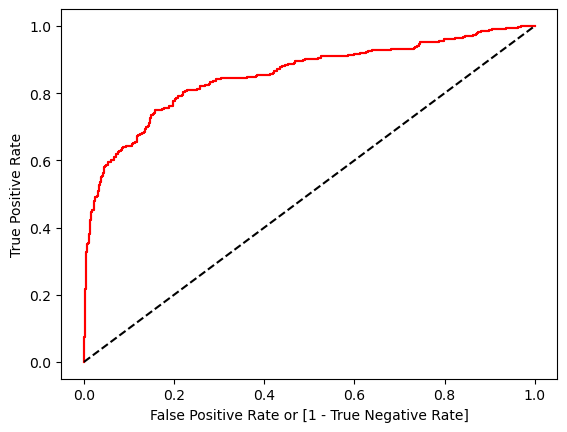

auc accuracy: 0.7798389416163359


In [38]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)